In [1]:
# pip install passlib

In [2]:
import pymysql
import sqlalchemy
import passlib
from sqlalchemy import create_engine
import pandas as pd
import getpass # To get the password without showing the input
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
#import sklearn

In [3]:
password = getpass.getpass()

········


In [4]:
type(password)

str

In [5]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

In [6]:
result = engine.execute('SELECT * FROM loan')
#for row in result:
#    print(row)
rows = [row for row in result]
pd.DataFrame(rows)
display(rows)

[(5314, 1787, 930705, 96396, 12, 8033.0, 'B', 'Defaulter - Contract finished'),
 (5316, 1801, 930711, 165960, 36, 4610.0, 'A', 'Good - Contract finished'),
 (6863, 9188, 930728, 127080, 60, 2118.0, 'A', 'Good - Contract finished'),
 (5325, 1843, 930803, 105804, 36, 2939.0, 'A', 'Good - Contract finished'),
 (7240, 11013, 930906, 274740, 60, 4579.0, 'A', 'Good - Contract finished'),
 (6687, 8261, 930913, 87840, 24, 3660.0, 'A', 'Good - Contract finished'),
 (7284, 11265, 930915, 52788, 12, 4399.0, 'A', 'Good - Contract finished'),
 (6111, 5428, 930924, 174744, 24, 7281.0, 'B', 'Defaulter - Contract finished'),
 (7235, 10973, 931013, 154416, 48, 3217.0, 'A', 'Good - Contract finished'),
 (5997, 4894, 931104, 117024, 24, 4876.0, 'A', 'Good - Contract finished'),
 (7121, 10364, 931110, 21924, 36, 609.0, 'A', 'Good - Contract finished'),
 (6077, 5270, 931122, 79608, 24, 3317.0, 'A', 'Good - Contract finished'),
 (6228, 6034, 931201, 464520, 60, 7742.0, 'B', 'Defaulter - Contract finished'),

In [7]:
data = pd.read_sql_query('SELECT * FROM bank.loan', engine)
data.head()

,loan_id,account_id,date,amount,duration,payments,status,status_desc
0,5314,1787,930705,96396,12,8033.0,B,Defaulter - Contract finished
1,5316,1801,930711,165960,36,4610.0,A,Good - Contract finished
2,6863,9188,930728,127080,60,2118.0,A,Good - Contract finished
3,5325,1843,930803,105804,36,2939.0,A,Good - Contract finished
4,7240,11013,930906,274740,60,4579.0,A,Good - Contract finished


In [8]:
engine.execute("DROP DATABASE IF EXISTS BootCamps")
engine.execute("CREATE DATABASE IF NOT EXISTS BootCamps")
engine.execute("USE BootCamps")

In [9]:
# by the way "\" is used to tell python that the line is so long that we are continuing in the next row

query = 'select order_id as "OrderID", account_id as "AccountID", bank_to as "DestinationBank", amount  as "Amount" \
from bank.order \
where k_symbol = "SIPO" \
limit 100'
data = pd.read_sql_query(query, engine)
data.head()
# type(data)

,OrderID,AccountID,DestinationBank,Amount
0,29401,1,YZ,2452.0
1,29403,2,QR,7266.0
2,29404,3,WX,1135.0
3,29407,4,UV,2078.0
4,29408,4,UV,1285.0


In [11]:
query = 'select * from bank.trans t \
left join bank.loan l \
on t.account_id = l.account_id \
where l.status in ("A", "B");'
data = pd.read_sql_query(query, engine)
data.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,loan_id,account_id,date,amount,duration,payments,status,status_desc
0,1548750,5270,930114,PRIJEM,PREVOD Z UCTU,44749.0,45549.0,,IJ,80269753,6077,5270,931122,79608,24,3317.0,A,Good - Contract finished
1,3393738,11265,930114,PRIJEM,VKLAD,1000.0,1000.0,,,0,7284,11265,930915,52788,12,4399.0,A,Good - Contract finished
2,3122924,10364,930117,PRIJEM,VKLAD,1100.0,1100.0,,,0,7121,10364,931110,21924,36,609.0,A,Good - Contract finished
3,1121963,3834,930119,PRIJEM,VKLAD,700.0,700.0,,,0,5754,3834,940928,23052,12,1921.0,A,Good - Contract finished
4,2809952,9307,930124,PRIJEM,VKLAD,900.0,900.0,,,0,6895,9307,940919,41904,12,3492.0,A,Good - Contract finished


In [12]:
query = 'select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status from bank.trans t \
left join bank.loan l \
on t.account_id = l.account_id \
where l.status in ("A", "B");'
data = pd.read_sql_query(query, engine)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,PREVOD Z UCTU,44749.0,45549.0,,79608,24,3317.0,A
1,PRIJEM,VKLAD,1000.0,1000.0,,52788,12,4399.0,A
2,PRIJEM,VKLAD,1100.0,1100.0,,21924,36,609.0,A
3,PRIJEM,VKLAD,700.0,700.0,,23052,12,1921.0,A
4,PRIJEM,VKLAD,900.0,900.0,,41904,12,3492.0,A


### duration => we can consider it as an ordinal categorical or as a numerical. We want to use it as a categorical, 
for which we need to convert now the type

In [13]:
data['duration'] = data['duration'].astype('str')
data['duration'] = data['duration'].astype('object') # This will be treated as categorical (ordinal)

In [14]:
data.describe()

,t_amount,balance,l_amount,payments
count,74364.000000,74364.000000,74364.000000,74364.000000
mean,7832.649125,46022.153061,102745.132645,4356.580832
std,11729.040391,25439.948570,74749.275498,2205.840892
min,0.000000,-14137.200000,4980.000000,319.000000
25%,144.300000,27675.125000,46320.000000,2569.000000
50%,3000.000000,40965.150000,86184.000000,4051.000000
75%,9868.500000,60098.550000,140400.000000,6315.000000
max,87300.000000,193910.000000,464520.000000,9736.000000


The categorical columns are:  Index(['type', 'operation', 'k_symbol', 'duration', 'status'], dtype='object')

Frequency analysis of column:  type

Frequency analysis of column:  operation

Frequency analysis of column:  k_symbol

Frequency analysis of column:  duration

Frequency analysis of column:  status



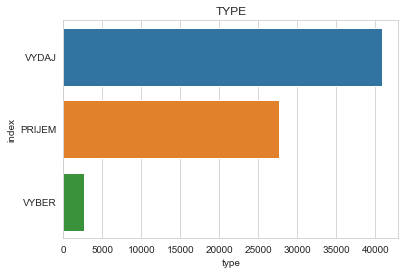

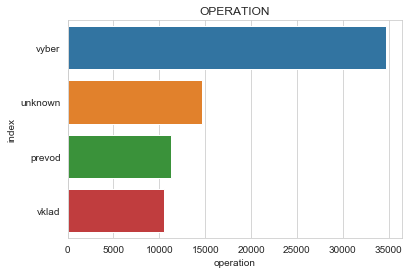

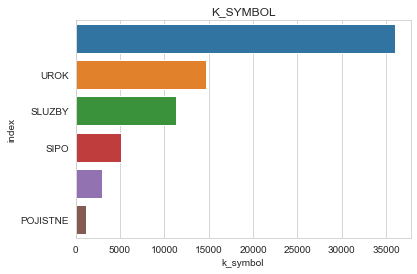

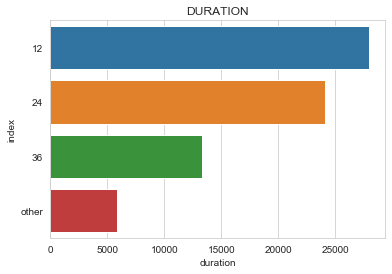

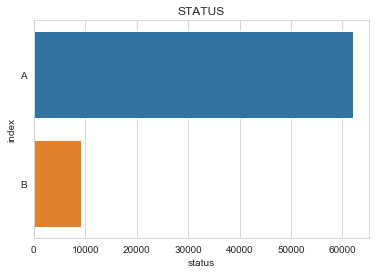

<Figure size 432x288 with 0 Axes>

In [37]:
## checking all the categorical columns
#col_cat = list(data.select_dtypes(include=['object']).columns)
cols_cat = data.select_dtypes(include=['object']).columns
print("The categorical columns are: ",cols_cat)
print("========================================")
print()
sns.set_style("whitegrid")
for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = data[col].value_counts().reset_index()
    #display(my_data)
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print()

In [16]:
# since we have a lot values for operation which are of type vyber,
# we are not removing that data from type column
def cleanOperation(x):
    x = x.lower()
    if 'vyber' in x:
        return "vyber"
    elif 'prevod' in x:
        return "prevod"
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'
data['operation'] = list(map(cleanOperation, data['operation']))
data['operation'].value_counts()

vyber      35057
unknown    14646
prevod     14136
vklad      10525
Name: operation, dtype: int64

In [ ]:
print("Current frequencies of of each value in column 'k_symbol': ",data['k_symbol'].value_counts())
print(data['k_symbol'].value_counts().index)
def cleankSymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x
data['k_symbol'] = list(map(cleankSymbol, data['k_symbol']))
print("Final frequencies of of each value in column 'k_symbol': ",data['k_symbol'].value_counts())

In [17]:
data = data[~data['k_symbol'].isin(['POJISTINE', 'SANKC. UROK', 'UVER'])]
data['k_symbol'].value_counts()

            35953
UROK        14646
SLUZBY      11306
SIPO         5081
             3018
POJISTNE     1159
Name: k_symbol, dtype: int64

In [18]:
data['duration'].value_counts().index
def cleanDuration(x):
    if x in ['48', '60']:
        return 'other'
    else:
        return str(x)
data['duration'] = list(map(cleanDuration, data['duration']))
data['duration'].value_counts()

12       27942
24       24077
36       13314
other     5830
Name: duration, dtype: int64

In [19]:
cat = data.select_dtypes(include = np.object)
cat = cat.drop(['status'], axis=1)
categorical = pd.get_dummies(cat, columns=['type', 'operation', 'k_symbol', 'duration'],drop_first=True)
categorical.head()

,type_VYBER,type_VYDAJ,operation_unknown,operation_vklad,operation_vyber,k_symbol_,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_SLUZBY,k_symbol_UROK,duration_24,duration_36,duration_other
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


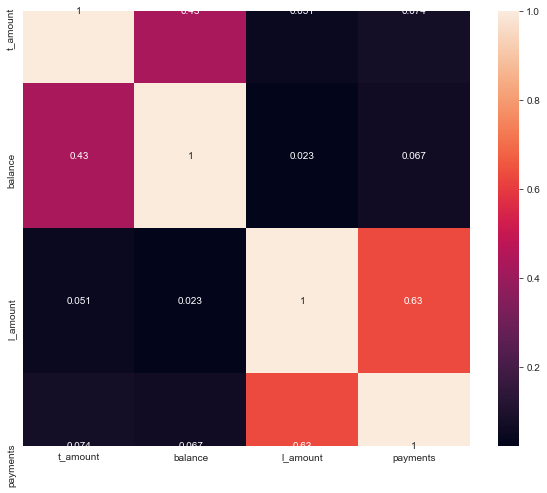

In [20]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

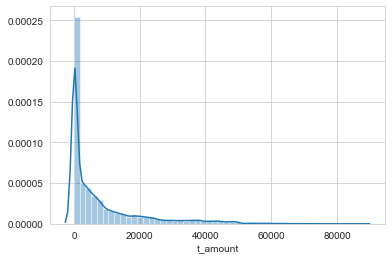

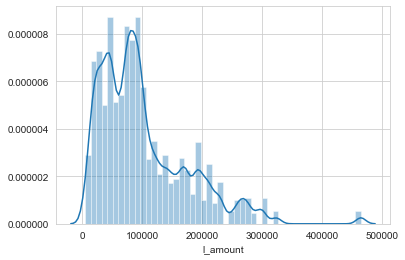

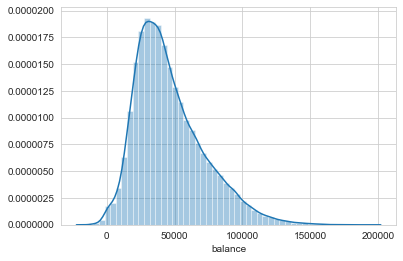

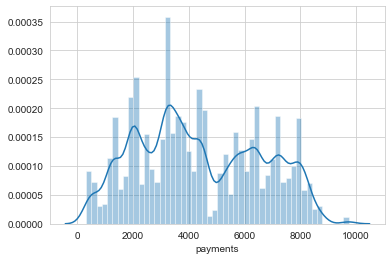

In [21]:
sns.distplot(data['t_amount'])
plt.show()
sns.distplot(data['l_amount'])
plt.show()
sns.distplot(data['balance'])
plt.show()
sns.distplot(data['payments'])
plt.show()

In [22]:

X = data.select_dtypes(include = np.number)
X1 = X.copy()
X2 = X.copy()

In [23]:
# scaling data
transformer = Normalizer().fit(X1)
x_normalized = transformer.transform(X1)
x_normalized = pd.DataFrame(x_normalized)

### Standarizer
# scaling data
transformer = StandardScaler().fit(X2)
x_standarized = transformer.transform(X2)
x_standarized = pd.DataFrame(x_standarized)

In [24]:
y = data['status']
X = np.concatenate((x_normalized, categorical), axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [26]:

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

C:\Users\Borja\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
y = data['status']
X = np.concatenate((x_standarized, categorical), axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [30]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

In [31]:

predictions = classification.predict(X_test)

display(predictions)

array(['A', 'A', 'A', ..., 'A', 'A', 'B'], dtype=object)

In [ ]:
# pip install sklearn

The accuracy of the model on test set is: 0.88 


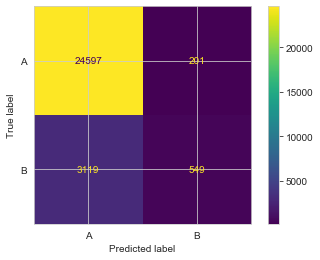

0.21414850532993346


In [32]:
print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print(cohen_kappa_score(y_test,predictions))

In [ ]:

print(sklearn.__version__)

In [ ]:
conda install -c anaconda scikit-learn